In [1]:
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.ticker import MultipleLocator, ScalarFormatter

import numpy as np
from IPython import display
import matplotlib.gridspec as gridspec
import sys

import math as math
import datetime
from datetime import timedelta, date

#import datetime as dt
import os
import glob
import matplotlib.dates as mdates
print (sys.path)
import pandas as pd
#import seaborn as sns
import matplotlib.dates as dates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter, YearLocator
#from model_utils import *
import datetime as dt
from datetime import timedelta


['/home/jp/Desktop-ROJ/Atmospheric-Pressure', '/home/jp/miniconda3/lib/python39.zip', '/home/jp/miniconda3/lib/python3.9', '/home/jp/miniconda3/lib/python3.9/lib-dynload', '', '/home/jp/miniconda3/lib/python3.9/site-packages']


In [2]:
def arrival_time(dist,c,train):
    t_aux = dist/c
    if train==1:
        dt0 = dt.datetime(2022,1,15,4,18,0)
    else:
        dt0 = dt.datetime(2022,1,15,4,18,0) + timedelta(hours=18)
    #t_huancayo = dist_huancayo/c
    h = int(t_aux)
    min_aux = (t_aux - int(t_aux))*60
    minute = int(min_aux)
    sec_aux = (min_aux-int(min_aux))
    sec = int(sec_aux)
    #print(h,minute,sec)
    delta = pd.Timedelta(hours=h,minutes=minute,seconds=sec)
    tf = dt0 + delta
    #print(tf)
    return tf

In [3]:
dist_piura = 10270.67
dist_huancayo = 10544.66 
dist_roj = 10390.95
c=350*(1/1000)*(3600)

In [4]:
t_roj = arrival_time(dist_roj,c,1)
t_piura = arrival_time(dist_piura,c,1)
t_huancayo = arrival_time(dist_huancayo,c,1)
print(t_roj,t_piura,t_huancayo)

2022-01-15 12:32:00 2022-01-15 12:27:00 2022-01-15 12:40:00


In [5]:
vi = 280
vf = 400
ci=vi*(1/1000)*(3600)
cf=vf*(1/1000)*(3600)
num=20
vs = np.linspace(vi,vf,num)
cs = np.linspace(ci,cf,num)

In [6]:
t_r = []
t_p = []
t_h = []
dt_rp = []
dt_hp = []
#dt_h = []
dt0 = dt.datetime(2022,1,15,4,18,0)
for c in cs:
    dt_roj = arrival_time(dist_roj,c,1)
    dt_piura = arrival_time(dist_piura,c,1)
    dt_huancayo = arrival_time(dist_huancayo,c,1)
    t_r.append(dt_roj)
    t_p.append(dt_piura)
    t_h.append(dt_huancayo)
    dt_rp.append((dt_roj-dt_piura).total_seconds())
    dt_hp.append((dt_huancayo-dt_piura).total_seconds())

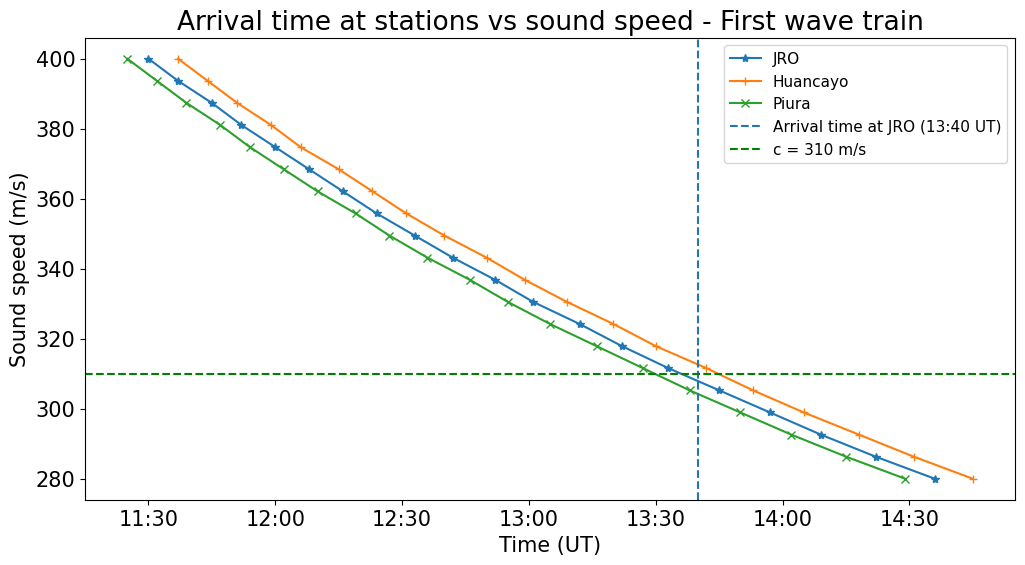

In [7]:
fontsize = 15
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t_r,vs,label='JRO',marker='*')
ax.plot(t_h,vs,label='Huancayo',marker='+')
ax.plot(t_p,vs,label='Piura',marker='x')
ax.axvline(x=dt.datetime(2022,1,15,13,40,0),linestyle='dashed',label='Arrival time at JRO (13:40 UT)')
ax.axhline(310,linestyle='dashed',color='green',label=r'c = 310 m/s')
ax.xaxis_date()
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_title('Arrival time at stations vs sound speed - First wave train',fontsize=fontsize+4)
ax.set_xlabel('Time (UT)',fontsize=fontsize)
ax.set_ylabel('Sound speed (m/s)',fontsize=fontsize)
plt.legend(fontsize=fontsize-4)
#plt.savefig('arrival-time-vs-sounds-speed-barometers.png',bbox_inches='tight')

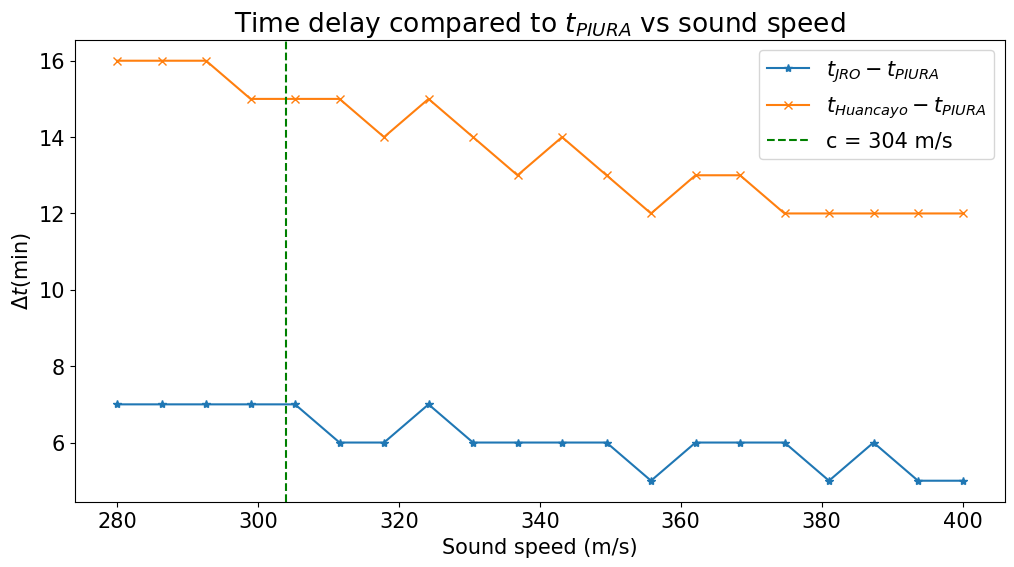

In [8]:
fontsize = 15
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(vs,np.array(dt_rp)/60,label=r'$t_{JRO}-t_{PIURA}$',marker='*')
ax.plot(vs,np.array(dt_hp)/60,label=r'$t_{Huancayo}-t_{PIURA}$',marker='x')
ax.axvline(304,linestyle='dashed',color='green',label=r'c = 304 m/s')
#ax.xaxis_date()
#date_format = mdates.DateFormatter('%H:%M')
#ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_title(r'Time delay compared to $t_{PIURA}$ vs sound speed',fontsize=fontsize+4)
ax.set_ylabel(r'$\Delta t$(min)',fontsize=fontsize)
ax.set_xlabel('Sound speed (m/s)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.savefig('time-delay-vs-sounds-speed-barometers.png',bbox_inches='tight')

In [9]:
dist_piura_2 = 9500.18 
dist_huancayo_2 = 9369.19   
dist_roj_2 = 9515.59  
vi = 280
vf = 400
ci=vi*(1/1000)*(3600)
cf=vf*(1/1000)*(3600)
num=20
vs = np.linspace(vi,vf,num)
cs = np.linspace(ci,cf,num)

In [10]:
t_r = []
t_p = []
t_h = []
dt_rp = []
dt_hp = []
#dt_h = []
dt0 = dt.datetime(2022,1,15,4,18,0)+timedelta(hours=18)
for c in cs:
    dt_roj = arrival_time(dist_roj_2,c,2)
    dt_piura = arrival_time(dist_piura_2,c,2)
    dt_huancayo = arrival_time(dist_huancayo_2,c,2)
    t_r.append(dt_roj)
    t_p.append(dt_piura)
    t_h.append(dt_huancayo)
    dt_rp.append((dt_roj-dt_piura).total_seconds())
    dt_hp.append((dt_huancayo-dt_piura).total_seconds())

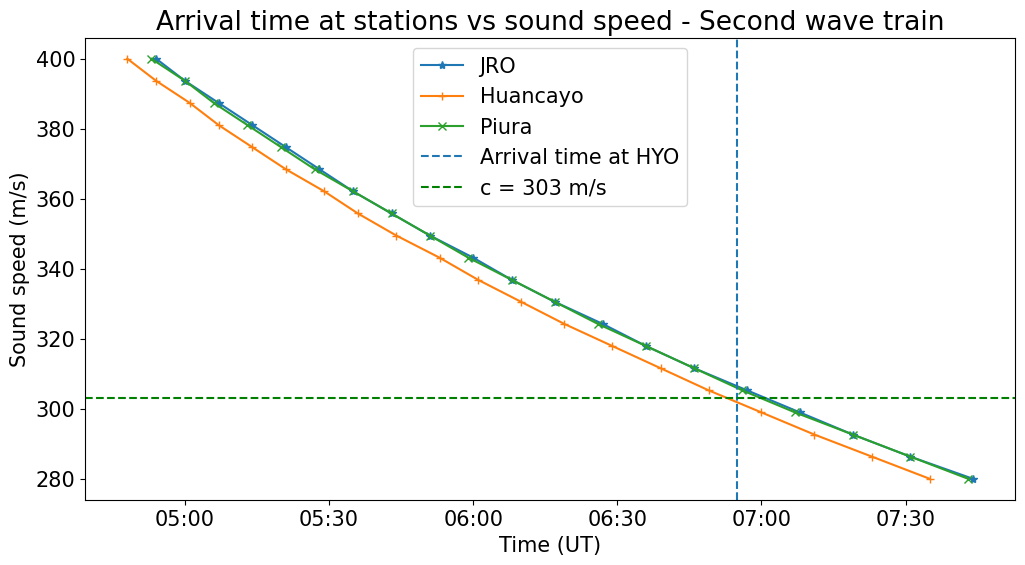

In [11]:
fontsize = 15
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t_r,vs,label='JRO',marker='*')
ax.plot(t_h,vs,label='Huancayo',marker='+')
ax.plot(t_p,vs,label='Piura',marker='x')
ax.axvline(x=dt.datetime(2022,1,16,6,55,0),linestyle='dashed',label='Arrival time at HYO')
ax.axhline(303,linestyle='dashed',color='green',label=r'c = 303 m/s')
ax.xaxis_date()
date_format = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_tick_params(labelsize=fontsize)
ax.yaxis.set_tick_params(labelsize=fontsize)
ax.set_title('Arrival time at stations vs sound speed - Second wave train',fontsize=fontsize+4)
ax.set_xlabel('Time (UT)',fontsize=fontsize)
ax.set_ylabel('Sound speed (m/s)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
#plt.savefig('arrival-time-vs-sounds-speed-barometers.png',bbox_inches='tight')